A. Traning Data generated 
- Required attributes customer_id, tenure, monthly_charges, contract_type, support_calls, etc

In [ ]:
#%pip install pandas

In [ ]:
#%pip install numpy

In [2]:
# notebooks/EDA_and_model_training.ipynb (or run this as a Python script)
import pandas as pd
import numpy as np

np.random.seed(42)
n_samples = 1000

data = {
    'customer_id': [f'CUST{i:04d}' for i in range(n_samples)],
    'tenure': np.random.randint(1, 72, n_samples),
    'monthly_charges': np.round(np.random.uniform(20, 120, n_samples), 2),
    'contract_type': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_samples),
    'support_calls': np.random.poisson(2, n_samples),
    'payment_method': np.random.choice(['Credit card', 'Bank transfer', 'Mailed check', 'Electronic check'], n_samples),
    'churn': np.random.choice([0, 1], size=n_samples, p=[0.75, 0.25])
}

df = pd.DataFrame(data)

#saving to csv file '/data/customer_data.csv'
df.to_csv('../data/customer_data.csv', index=False)

#displaying the first 5 rows of the dataframe
df.head()


,customer_id,tenure,monthly_charges,contract_type,support_calls,payment_method,churn
0,CUST0000,52,105.57,One year,2,Electronic check,1
1,CUST0001,15,103.02,One year,1,Mailed check,0
2,CUST0002,61,59.72,Two year,1,Mailed check,0
3,CUST0003,21,86.81,Month-to-month,0,Bank transfer,0
4,CUST0004,24,40.50,One year,3,Mailed check,0


B. Exploratory Data Analysis (EDA)
- Step 1: Load & Explore the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/customer_data.csv')
print(df.shape)
df.head()


(1000, 7)


,customer_id,tenure,monthly_charges,contract_type,support_calls,payment_method,churn
0,CUST0000,52,105.57,One year,2,Electronic check,1
1,CUST0001,15,103.02,One year,1,Mailed check,0
2,CUST0002,61,59.72,Two year,1,Mailed check,0
3,CUST0003,21,86.81,Month-to-month,0,Bank transfer,0
4,CUST0004,24,40.50,One year,3,Mailed check,0


- Step 2: Churn Distribution

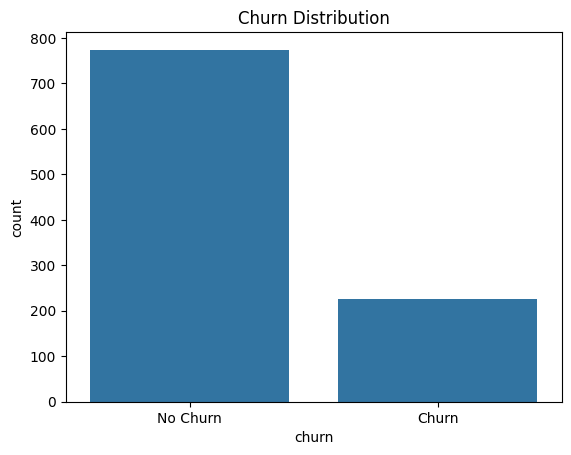

churn
0    0.774
1    0.226
Name: proportion, dtype: float64


In [2]:
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

print(df['churn'].value_counts(normalize=True))


- Step 3: Numerical Features vs. Churn

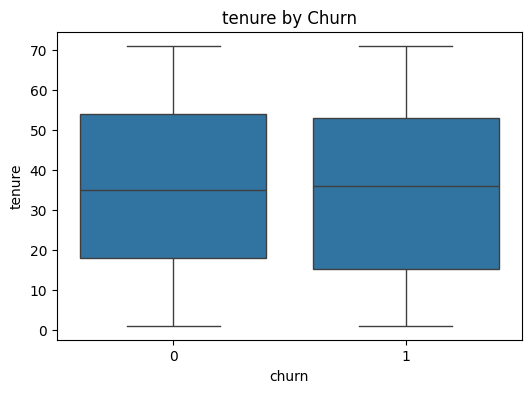

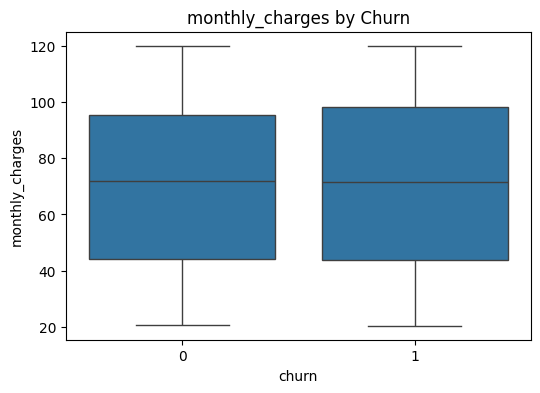

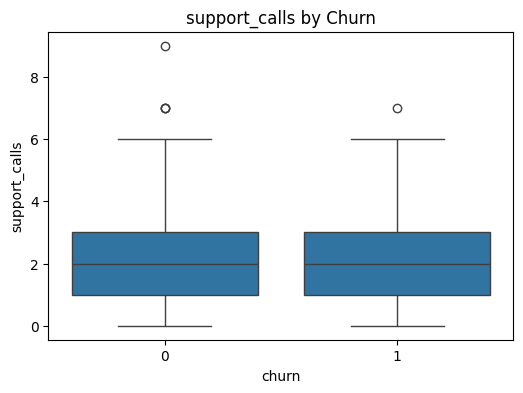

In [3]:
numerical_cols = ['tenure', 'monthly_charges', 'support_calls']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.show()


- Step 4: Categorical Features vs. Churn

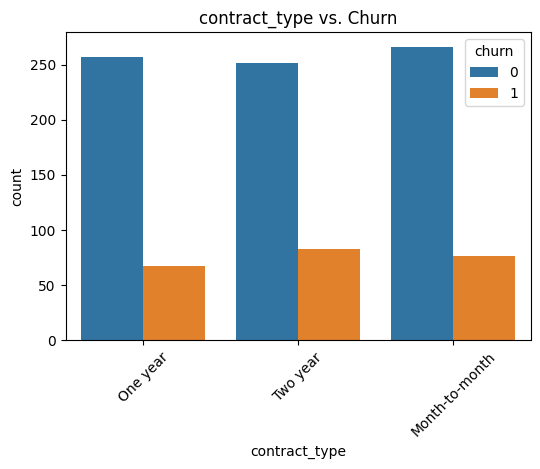

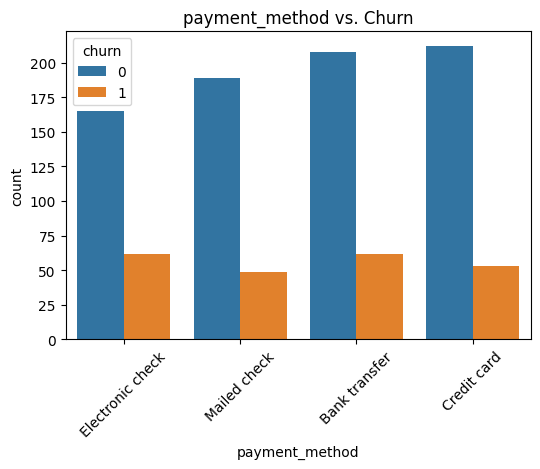

In [4]:
categorical_cols = ['contract_type', 'payment_method']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='churn', data=df)
    plt.title(f'{col} vs. Churn')
    plt.xticks(rotation=45)
    plt.show()


C. Feature Encoding + Model Training

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

# Encode categorical columns
df_encoded = df.copy()
le = LabelEncoder()
for col in ['contract_type', 'payment_method']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop(['customer_id', 'churn'], axis=1)
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, '../models/churn_model.pkl')

# Save the exact feature order
joblib.dump(X.columns.tolist(), '../models/input_features.pkl')


              precision    recall  f1-score   support

           0       0.78      0.96      0.86       158
           1       0.00      0.00      0.00        42

    accuracy                           0.76       200
   macro avg       0.39      0.48      0.43       200
weighted avg       0.62      0.76      0.68       200



['../models/input_features.pkl']